**Outline**

1. Topic Review
2. Case 1 - Default Prediction
3. Case 2 - Wells in Bangladesh
4. Case 3 - National Election Study

- We need to import library and function that need to run the code in this notebook to:
  - load data
  - doing simulation
  - drawing graph and other visualization

In [1]:
%pip install "https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl"
import warnings
warnings.simplefilter("ignore")

# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.3 MB/s eta 0:00:00


In [2]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

# **Topic Review**
---
Logistic regression is a regression model that modeled the outcome as the probability using logistic function
$$p(y) = \text{logit}^{-1}(X\beta)$$
- We can also write the model inter of logit probability
$$\text{logit}(p(y)) = X\beta$$
- Estimated coefficient can be identified by using maximum likelihood estimation, with help of iterative optimization logarithm such as gradient descent
- Coefficient interpretation that could be used;
  1. Evaluation near mean
     - One unit difference near mean in correspond logit difference  in y
  2. Interpreting Coefficient by divide by 4 rule
     - One unit difference in x correspond $\beta/4$ in y
  3. Interpreting as odd ratio
     - One unit difference in x correspond to $e^{\beta}$ multiplicative change in y
- We can evaluate the model by using percentage correct prediction or log score
$$\text{out-of-sample log score} = \sum_{i}^{n^{\text{new}}}\left\{\begin{matrix}
\log(p_i^{\text{new}}) & \text{if } y_i^{\text{new}}=1\\
\log(1-p_i^{\text{new}}) & \text{if } y_i^{\text{new}}=0
\end{matrix}\right.$$

We'll explore the application of logistic regression in some cases, starting with the simplest one, using single predictor and then using multiple predictors

# **Case 1 - Default Prediction**
---

Given the data containing information on ten thousand customers.

We are interested in predicting whether an individual will default on his or her credit card debt, on the basis of annual income

### Load Data

In [4]:
default = pd.read_csv("default.csv")
default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


What we have:

- default: A factor with levels No and Yes indicating whether the customer defaulted on their debt
- student: A factor with levels No and Yes indicating whether the customer is a student
- balance: The average balance that the customer has remaining on their credit card after making their monthly payment
- income: Annual income of customer


Visualize default and balance

<Axes: xlabel='balance', ylabel='default'>

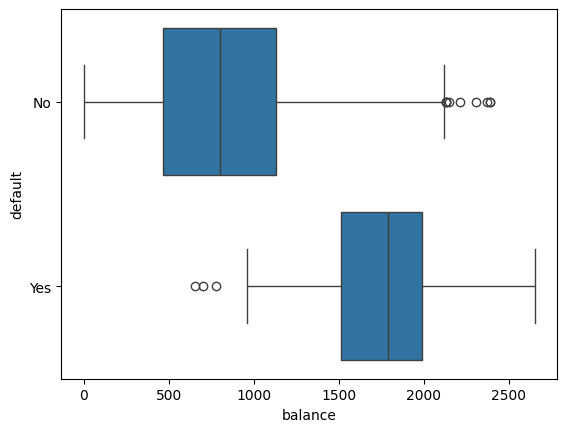

In [5]:
sns.boxplot(y = 'default', x = 'balance', data = default)

- The figure shows the distribution of balance split by the binary default variable
- It appears that individuals who defaulted tended to have higher credit card balances than those who did not.

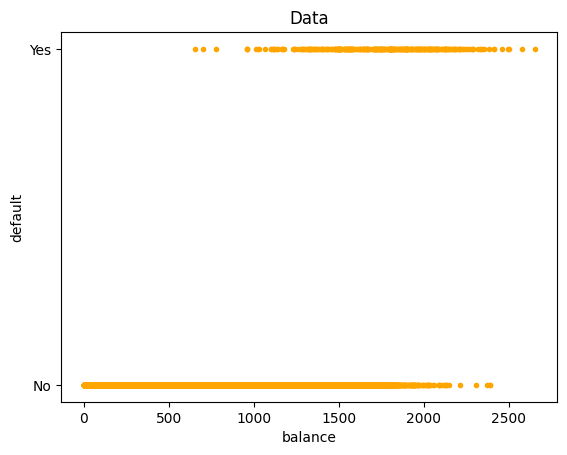

In [6]:
x = default["balance"]
y = default["default"]

# Plot the data
plt.scatter(x, y, color = "orange", marker=".")

# Add a legend and labels

plt.xlabel("balance")
plt.ylabel("default")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

### Data Preparation

Use LabelEncoder to convert the Default variable into numeric

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the Default variable
default["default"] = LabelEncoder().fit_transform(default["default"])

# Display the 5th first row after transforming
default[["default","balance"]].head()

,default,balance
0,0,729.526495
1,0,817.180407
2,0,1073.549164
3,0,529.250605
4,0,785.655883


In [8]:
default.isna().sum()

,0
default,0
student,0
balance,0
income,0


We have no missing value, the data are ready for modelling

### Fit Logistic Regression - Using Credit Balance Variable

- Build the model using ols

In [9]:
# Create Logit model object
logit_model = smf.logit("default ~ balance", default)

# Fit the model
model_default = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_default_coef = print_coef_std_err(model_default)

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


### Visualize the data and the logistic regression line

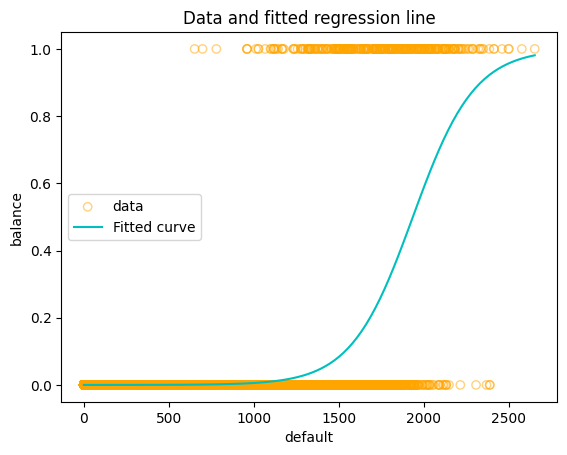

In [10]:
predictor = "balance"
outcome = "default"
data = default.copy()
results_ = results_default_coef.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker= 'o', facecolors = "none", edgecolor="orange", alpha=0.5, label='data')

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

# get values from predictor range
x_range = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 100)

# predicted probabilities of x in x_range
pred_prob = expit(a_hat + b_hat*x_range)

# Plot the fitted line
plt.plot(x_range, pred_prob, label="Fitted curve", color = "c")

# Add a legend and labels
plt.legend()
plt.ylabel("balance")
plt.xlabel("default")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Coefficient Interpretation
- Now we read the result of the model, and interpret each coefficient

In [11]:
results_default_coef

,coef,std err
Intercept,-10.651331,0.361169
balance,0.005499,0.000220


$$P(\text{Default}) = \text{logit}^{-1}(-10.7 + 0.0055\text{balance})$$

- Positive coefficient indicates that higher credit balance tend to have higher probability of default
- To be precise, a one-unit change in balance is associated with a positive difference in the log odds of default by 0.0055
units.
- Using divide by 4 rule: near the average balance,
  - 1 unit more in balance corresponds to an approximately 0.1375% (0.0055/4) positive difference in probability of default

  ### Prediction

  - Next, make predict of default probability for two individuals with a difference credit balance of $1,000

In [12]:
new_balance = np.array([1000,2000])
new_data = pd.DataFrame(data = new_balance, columns = ["balance"])

In [13]:
new_data["predicted_p_default"] = model_default.predict(new_data)
new_data

,balance,predicted_p_default
0,1000,0.005752
1,2000,0.585769


- The model predict probability of a person that have `$1,000` credit balance below 1 %.
- In contrast, the predicted probability of default for an individual with a balance of `$2,000` is much higher, and equals 0.586 or 58.6 %.

# **Case 2 - Wells in Bangladesh**
---

- Many wells in Bangladesh and other South Asian countries used for drinking water are contaminated with natural arsenic, affecting an estimated 100 million people. Arsenic is a cumulative poison that increases the risk of cancer and other diseases. Even if a neighbor's well is safe, it does not mean that another well is safe.
- However, if a well has high arsenic levels, there are usually nearby safe wells that can be used if willing to walk and share with neighbors.
- A research team from the United States and Bangladesh measured wells in a small area of Bangladesh and labeled them as safe or unsafe based on their arsenic levels. the Bangladesh standard for arsenic in drinkingwater) or “unsafe” (above 0.5).
- People in households with unsafe wells were encouraged to switch to nearby safe wells or construct new ones.
- A few years later, the researchers returned to find out who had switched wells.
- We shall perform a logistic regression analysis to understand the factors that predict well switching among the users of unsafe wells. Our outcome variable is

$$y_i = \left\{\begin{matrix}
1 & \text{if household }i \text{ switched to a new well}\\
0 & \text{if household }i \text{ continued using its own well}
\end{matrix}\right.$$

### Load Data



In [16]:
wells = pd.read_csv("wells_bangladesh.csv")
wells

,switch,arsenic,dist,dist100,educ,educ4
0,1,2.36,16.826000,0.16826,0,0.00
1,1,0.71,47.321999,0.47322,0,0.00
2,0,2.07,20.966999,0.20967,10,2.50
3,1,1.15,21.486000,0.21486,12,3.00
4,1,1.10,40.874001,0.40874,14,3.50
...,...,...,...,...,...,...
3015,0,0.52,19.347000,0.19347,5,1.25
3016,0,1.08,21.386000,0.21386,3,0.75
3017,0,0.51,7.708000,0.07708,4,1.00
3018,0,0.64,22.841999,0.22842,3,0.75


We consider the following inputs variables:
- The distance (in meters) to the closest known safe well.
    - The predictor dist100 is dist/100: distance to the nearest safe well in 100-meter units. It seems more reasonable to rescale distance in 100-meter units
- The arsenic level of respondent’s well.
- The education level of the head of household.
    - We actually work with educ4 = educ/4 for the usual reasons of making the regression coefficient more interpretable
    - it now represents the predictive difference corresponding to four years of education,
    - for example comparing a high school graduate to an elementary school graduate or to a college graduate.

    Visualize the data

In [17]:
wells["switch_cat"] = ["Yes" if i==1 else "No" for i in wells["switch"]]

<Axes: xlabel='arsenic', ylabel='switch_cat'>

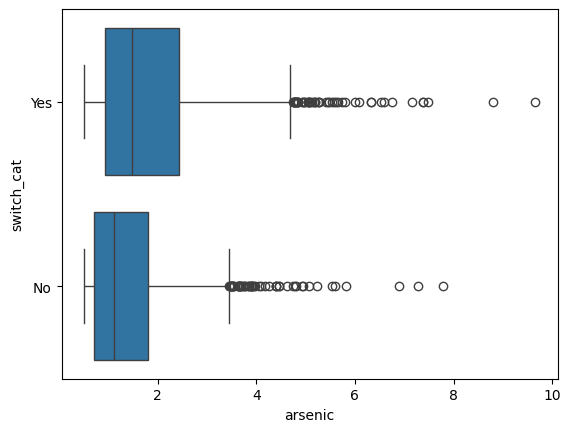

In [18]:
sns.boxplot(y = 'switch_cat', x = 'arsenic', data = wells)

<Axes: xlabel='dist100', ylabel='switch_cat'>

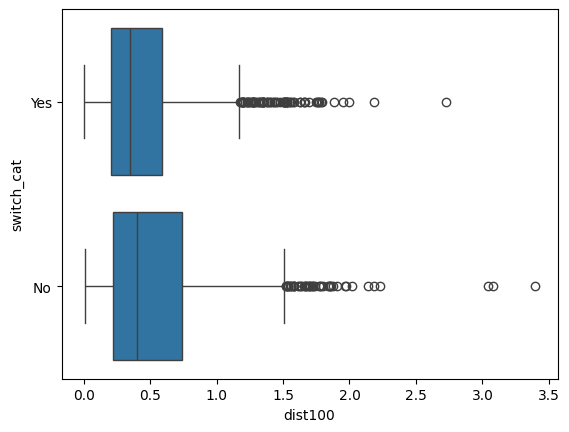

In [19]:
sns.boxplot(y = 'switch_cat', x = 'dist100', data = wells)

- The figure shows the distribution of arsenic level and distance in 100 meters unit split by the binary default variable
- Individuals who switch wells have higher well's arsenic level and lower distance to the closest known safe well, it's make sense.

### Fit Logistic Regression

- We shall first fit the model just using distance to the nearest well and arsenic concentration, and then put other predictor, education.
- Build the model using logit

In [20]:
# Create Logit model object
logit_model = smf.logit("switch ~ dist100 + arsenic", wells)

# Fit the model
model_switch = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_switch_coef = print_coef_std_err(model_switch)

Optimization terminated successfully.
         Current function value: 0.650773
         Iterations 5


In [21]:
results_switch_coef

,coef,std err
Intercept,0.002749,0.079448
dist100,-0.896644,0.104347
arsenic,0.460775,0.041385


#### Visualize the data and the logistic regression line
- Since we have two variables, we will draw the curved line in each predictor given two different values of other predictor

1. Plot curved line on distance variable given two arsenic level, 1 and 0.5

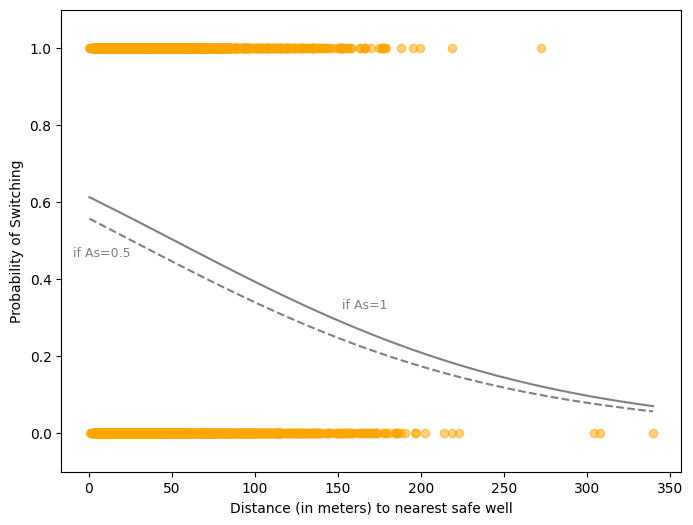

In [22]:
b0_hat = results_switch_coef["coef"]["Intercept"]
b1_hat = results_switch_coef["coef"]["dist100"]
b2_hat = results_switch_coef["coef"]["arsenic"]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
ax.scatter(wells["dist"], wells["switch"], marker='o', color='orange', alpha=0.5)

# Range of dist100 variable
x_range = np.linspace(np.min(wells["dist"]), np.max(wells["dist"]), 100)

# Plot logistic regression line, given arsenic level = 1
ax.plot(x_range, expit(b0_hat + b1_hat*x_range/100 + b2_hat*1), color='gray')

# Plot logistic regression line, given arsenic level = 0.5
ax.plot(x_range, expit(b0_hat + b1_hat*x_range/100 + b2_hat*0.5), linestyle='--', color='gray')

ax.text(25, 0.45, f" if As=0.5", color='gray', ha='right', va='bottom', fontsize=9)
ax.text(150, 0.35, f" if As=1", color='gray', ha='left', va='top', fontsize=9)

ax.set(xlabel='Distance (in meters) to nearest safe well', ylabel='Probability of Switching', ylim=[-0.1, 1.1])

plt.show()

As expected the respondent that have lower distance to the known safe well have higher probability to switch well

#### Coefficient Interpretation
- Now we read the result of the model, and interpret each coefficient

In [23]:
results_switch_coef

,coef,std err
Intercept,0.002749,0.079448
dist100,-0.896644,0.104347
arsenic,0.460775,0.041385


$$P(\text{Switch}) = \text{logit}^{-1}(0.003 + 0.46\text{arsenic} + -0.90\text{dist})$$
- Comparing two wells with the same arsenic level, every 100 meters in distance to the nearest safe well corresponds to a negative difference of 0.90 in the logit probability of switching.
- Similarly, a difference of 1 in arsenic concentration corresponds to a 0.46 positive difference in the logit probability of switching.
- Both coefficients are large compared to their standard errors.
- And both their signs make sense: switching is easier if there is a nearby safe well, and if a household’s existing well has a high arsenic level, there should be more motivation to switch.

For a quick interpretation, we divide each of the coefficients by 4:
- 100 meters more in distance corresponds to an approximately 22% (0.9/4) lower probability of switching, and
- 1 unit more in arsenic concentration corresponds to an approximately 11% (0.46/4) positive difference in switching probability.

Comparing these two coefficients, it would at first seem that distance is a more important factor than arsenic level in determining the probability of switching. Such a statement is misleading, however.


In [24]:
print(f"standard deviation dist100 : {wells['dist100'].std():.2f}")
print(f"standard deviation arsenic level : {wells['arsenic'].std():.2f}")

standard deviation dist100 : 0.38
standard deviation arsenic level : 1.11


In our data dist100 shows less variation than arsenic: the standard deviation of distances to the nearest well is 0.38 (in units of 100 meters), whereas arsenic levels have a standard deviation of 1.10 on the scale used here.

- Thus, the logistic regression coefficients corresponding to 1-standard-deviation differences are −0.90 ∗ 0.38 = −0.34 for distance and 0.46 ∗ 1.10 = 0.51 for arsenic level.
- Dividing by 4 yields the quick summary estimate that a difference of 1 standard deviation in distance corresponds to an expected −0.34/4 or approximately 8% negative difference in Pr(switch), and a difference of 1 standard deviation in arsenic level corresponds to an expected 0.51/4 or approximately 13% positive difference in Pr(switch).

#### Evaluation

##### Log score for null model

Consider we're just guessing the predicted probability of switching by flippling a coin (p=0.5), The log score is:

In [25]:
# predicted outcome (p)
prob = 0.5

# true outcome
switch = wells["switch"].copy()

logscore_null_model = np.sum(switch * np.log(prob) + (1 - switch) * np.log(1 - prob))
logscore_null_model

-2093.3044852910352

Extract log score in DataFrame for more convenient comparison

In [26]:
logscore = pd.DataFrame(data = logscore_null_model, columns = ["log_score"], index = ["null_model"])
logscore

,log_score
null_model,-2093.304485


##### Log score for baseline model

Considet we guess the predicted probability of switch by guessing using proportion of switch in our data

In [27]:
# the proportion of the "switch"
prob = round(np.sum(switch)/len(switch), 2)
prob

0.58

Just using the fact that 58% of survey respondents switch well and 42% do not switch well, we can assign 58% to P(Switch = 1) for each respondent

In [28]:
# number of respondents who switch the well
np.sum(switch)

1737

In [29]:
# number of respondents who not switch the well
np.sum(1 - switch)

1283

In [30]:
logscore_baseline_model = np.sum(switch * np.log(prob) + (1 - switch) * np.log(1 - prob))
logscore_baseline_model

-2059.194332107344

Which improves the log score to $1,737 \log(0.58) + 1,283 \log(0.42) = -2,059$

In [31]:
logscore.loc["baseline_model","log_score"] = logscore_baseline_model
logscore

,log_score
null_model,-2093.304485
baseline_model,-2059.194332


##### Log score for logistic model

Let's see if our fit further improves when we include some predictors to predict switching wells:

- Predicted probability values from statsmodel

In [32]:
pred_prob_switch = model_switch.predict(wells[["arsenic","dist100"]])
pred_prob_switch

,0
0,0.718960
1,0.476415
2,0.683208
3,0.584187
4,0.535716
...,...
3015,0.517213
3016,0.576551
3017,0.542058
3018,0.523192


- Calculate log score manually

In [33]:
logscore_logreg_model1 = np.sum(switch * np.log(pred_prob_switch) + (1 - switch) * np.log(1-pred_prob_switch))
logscore_logreg_model1

-1965.334134119466

- You can use llf results too under statsmodels model results

In [34]:
model_switch.llf

-1965.334134119466

It have the exactly same results

In [35]:
logscore.loc["logreg_model1","log_score"] = logscore_logreg_model1
logscore

,log_score
null_model,-2093.304485
baseline_model,-2059.194332
logreg_model1,-1965.334134


- The log score for the new model is -1965.3

##### Difference of Log score

Comparison our logistic regression model to the model with probability guessing from the data yields

In [36]:
diff_logscore = logscore["log_score"]["logreg_model1"] - logscore["log_score"]["null_model"]
diff_logscore

127.97035117156929

- Including arsenic level and distance in 100 meters in the model clearly improves the predictive accuracy than just guessing the probability of switch from the proportion of switching in the data
- The improvement in predictive probabilities (128) describes how much more accurately we are predicting the probabilities.

##### Log Score - LOO Cross Validation

Now, to have more generalized performanceto, we calculate log score use LOO (Leave-One-Out) cross validation

Helper Function

In [37]:
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold

def loo_split(data):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame>
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    loo = LeaveOneOut()
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(loo.split(data)):
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()

    return (fold_train, fold_test)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame>
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    kfold = KFold(n_splits = n_fold,
                  shuffle = True,
                  random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()

    return (fold_train, fold_test)

Data Splitting

In [38]:
fold_train, fold_test = loo_split(data = wells)

In [39]:
fold_train[0].head()

,switch,arsenic,dist,dist100,educ,educ4,switch_cat
1,1,0.71,47.321999,0.47322,0,0.00,Yes
2,0,2.07,20.966999,0.20967,10,2.50,No
3,1,1.15,21.486000,0.21486,12,3.00,Yes
4,1,1.10,40.874001,0.40874,14,3.50,Yes
5,1,3.90,69.517998,0.69518,9,2.25,Yes


In [40]:
fold_test[0]

,switch,arsenic,dist,dist100,educ,educ4,switch_cat
0,1,2.36,16.826,0.16826,0,0.0,Yes


As LOO will leave one observation out as test data, so in each folds, we have 3019 observations as train data, and 1 observations as test data
- Fit n times models and use it to predict 1 observation as test data
- It may takes time, since loo create n times model

In [41]:
# create empty list to store predicted probabilities
pred_list = []

# n data iteration to perform loo
for i in range(len(wells)):

    # build model for each train fold
    model = smf.logit("switch ~ arsenic + dist100", data = fold_train[i] )
    fit = model.fit(disp=0)

    # model prediction for each test fold
    pred = fit.predict(fold_test[i][["arsenic","dist100"]])

    # store the probability prediction to list
    pred_list.append(pred)

Make new dataframe to save the predicted probabilities and y true of test data

In [42]:
prediction = pd.DataFrame(data = np.array(pred_list), columns=["test_pred_prob"])
prediction["y"] = [fold_test[i]["switch"].values[0] for i in range(len(wells))]
prediction.head()

,test_pred_prob,y
0,0.718715,1
1,0.476079,1
2,0.683667,0
3,0.583961,1
4,0.535514,1


In [43]:
# Compute log score for each test data
prediction["log_score"] = prediction["y"] * np.log(prediction["test_pred_prob"]) \
                            + (1-prediction["y"]) * np.log(1 - prediction["test_pred_prob"])

In [44]:
prediction.head()

,test_pred_prob,y,log_score
0,0.718715,1,-0.330290
1,0.476079,1,-0.742171
2,0.683667,0,-1.150959
3,0.583961,1,-0.537922
4,0.535514,1,-0.624527


- Cross validation score compute the average log score that resulted log score for 1 observation (since the test data only have 1 observation)

In [45]:
prediction["log_score"].mean()

-0.651840966783151

- We would like to now the log score of all observations to do comparison of other computed log score, thus we need compute the log score for all observation
- We can use the cross validation score times the size of test data

In [46]:
prediction["log_score"].mean()*len(wells)

-1968.5597196851159

- or compute the log score manually

In [47]:
logscore_logreg_model_loo = np.sum(prediction["y"] * np.log(prediction["test_pred_prob"]) \
                                   + (1 - prediction["y"]) * np.log(1-prediction["test_pred_prob"]))
logscore_logreg_model_loo

-1968.5597196851159

- It will have the same result

In [48]:
# Store to logscore dataframe

logscore.loc["logreg_model_loo","log_score"] = logscore_logreg_model_loo
logscore

,log_score
null_model,-2093.304485
baseline_model,-2059.194332
logreg_model1,-1965.334134
logreg_model_loo,-1968.559720


- The LOO estimated log score of $\approx$ -1968 is 3 lower than log score of -1965 computed before;
- This difference is about what we would expect, given that the fitted model has 3 parameters or degrees of freedom.

### Fit Logistic Regression - Add Interactiona

Next, try to add interaction and see the computed logscore

In [49]:
# Create Logit model object
logit_model = smf.logit("switch ~ dist100 + arsenic + dist100:arsenic", wells)

# Fit the model
model_switch_i1 = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_switch_coef_i1 = print_coef_std_err(model_switch_i1)

Optimization terminated successfully.
         Current function value: 0.650270
         Iterations 5


#### Coefficient Interpretation

- Now we read the result of the model, and interpret each coefficient



In [50]:
results_switch_coef_i1

,coef,std err
Intercept,-0.147868,0.117538
dist100,-0.577218,0.209179
arsenic,0.555977,0.069319
dist100:arsenic,-0.178906,0.102328


$$P(\text{Switch}) = \text{logit}^{-1}(-0.15 -0.58\text{dist100} + 0.56\text{arsenic}) - 0.18 \text{dist100} \times \text{arsenic} $$

To understand the numbers in the table, we use the following tricks:

In [51]:
wells["dist100"].mean()

0.48331862570424344

In [52]:
wells["arsenic"].mean()

1.656930463576159

- Evaluating predictions and interactions at the mean of the data, which have average values of 0.48 for dist100 and 1.66 for arsenic (that is, a mean distance of 48 meters to the nearest safe well, and a mean arsenic level of 1.66 among the unsafe wells).
- Dividing by 4 to get approximate predictive differences on the probability scale.

**Interpretation**

1. Intercept term
   - if the distance to the nearest safe well is 0 and the arsenic level of the current well is 0. This is an impossible condition (since arsenic levels all exceed 0.5 in our set of unsafe wells), so we do not try to interpret the Intercept term. We need evaluate the the intercept at mean by using centering
   2. Coefficient for distance
    - This corresponds to comparing two wells that differ by 1 in dist100, if *the arsenic level is 0* for both wells. Once again, we should not try to interpret this.
    - Instead, we can look at the average value, arsenic = 1.66, where distance has a coefficient of −0.58 − 0.18 ∗ 1.66 = −0.88 on the logit scale.
    - To quickly interpret this on the probability scale, we divide by 4: −0.88/4 = −0.22. Thus, at the mean level of arsenic in the data, each 100 meters of distance corresponds to an approximate 22% negative difference in probability of switching.
    3. Coefficient for arsenic
    - This corresponds to comparing two wells that differ by 1 in arsenic, if *the distance to the nearest safe well is 0* for both.
    - Again, this is not so interpretable, so instead we evaluate the comparison at the average value for distance, dist100 = 0.48, where arsenic has a coefficient of 0.56 − 0.18 ∗ 0.48 = 0.47 on the logit scale.
    - To quickly interpret this on the probability scale, we divide by 4: 0.47/4 = 0.12. Thus, at the mean level of distance in the data, each additional unit of arsenic corresponds to an approximate 12% positive difference in probability of switching.

    4. Coefficient for the interaction term. This can be interpreted in two ways.
    - Each additional unit of arsenic, the value −0.18 is added to the coefficient for distance. The coefficient for distance is −0.88 at the average level of arsenic, thus, we can understand the interaction as saying that the importance of distance as a predictor increases for households with higher existing arsenic levels.
    - For each additional 100 meters of distance to the nearest well, the value −0.18 is added to the coefficient for arsenic. The coefficient for distance is 0.47 at the average distance to nearest safe well, thus the importance of arsenic as a predictor decreases for households that are farther from existing safe wells.

    #### Log Score - LOO


In [53]:
# Split data
fold_train, fold_test = loo_split(data = wells)

# create empty list to store predicted probabilities
pred_list = []

# LOO CV
for i in range(len(wells)):

    # build model for each train fold
    model = smf.logit("switch ~ arsenic + dist100 + arsenic:dist100", data = fold_train[i] )
    fit = model.fit(disp=0)

    # model prediction for each test fold
    pred = fit.predict(fold_test[i][["arsenic","dist100"]])

    # store the probability prediction to list
    pred_list.append(pred)

# Compute LOO Log Score

prediction = pd.DataFrame(data = np.array(pred_list), columns=["test_pred_prob"])

prediction["y"] = [fold_test[i]["switch"].values[0] for i in range(len(wells))]
prediction["log_score"] = prediction["y"] * np.log(prediction["test_pred_prob"]) + (1-prediction["y"]) * np.log(1 - prediction["test_pred_prob"])
logscore_logreg_model1_loo = prediction["log_score"].mean()*len(wells)

# Store the log score
logscore.loc["logreg_model1_loo","log_score"] = logscore_logreg_model1_loo
logscore

,log_score
null_model,-2093.304485
baseline_model,-2059.194332
logreg_model1,-1965.334134
logreg_model_loo,-1968.559720
logreg_model1_loo,-1968.250091


In [54]:
# log score difference the current model, interaction model with previous model (with no iteraction)

logscore["log_score"]["logreg_model1_loo"] - logscore["log_score"]["logreg_model_loo"]

0.3096285373903811

- The improvement in predictive probabilities (0.3) is low
- There is no need to keep the interaction in the model for the predictive purposes (unless new information can be obtained)

Now let's add education predictor
- We shall centering the predictor for more convenient interpretation

### Centering

In [55]:
wells["c_dist100"] = wells["dist100"]- wells["dist100"].mean()
wells["c_arsenic"] = wells["arsenic"]- wells["arsenic"].mean()
wells["c_educ4"] = wells["educ4"]- wells["educ4"].mean()

### Fit Logistic Regression - Add Other Predictor

In [56]:
# Create Logit model object
logit_model = smf.logit("switch ~ c_dist100 + c_arsenic + c_educ4", wells)

# Fit the model
model_switch_edu = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_switch_coef_edu = print_coef_std_err(model_switch_edu)

Optimization terminated successfully.
         Current function value: 0.647423
         Iterations 5


#### Coefficient Interpretation

- Now we read the result of the model, and interpret each coefficient

In [57]:
results_switch_coef_edu

,coef,std err
Intercept,0.335988,0.038468
c_dist100,-0.895644,0.104610
c_arsenic,0.468364,0.041592
c_educ4,0.171281,0.038298


**Intercept**

- This value represent inverse logit of 0.35 is the estimated probability of switching, if c_dist100 = 0, c_arsenic = 0

In [58]:
expit(0.35)

0.5866175789173301

   - That is, if distance to nearest safe well and arsenic level are at their averages in the data, the probability of switching is 59%.

   **Coefficient for c_dist100**
- To quickly interpret this on the probability scale, we divide by 4: −0.88/4 = −0.22. Thus, at the mean level of arsenic in the data, each 100 meters of distance corresponds to an approximate 22% negative difference in probability of switching.

**Coefficient for c_arsenic**
- To quickly interpret this on the probability scale, we divide by 4: 0.47/4 = 0.12. Thus, at the mean level of distance in the data, each additional unit of arsenic corresponds to an approximate 12% positive difference in probability of switching.

**Coefficient for Education**
- Respondents with higher education are more likely to say they would switch wells: the crude estimated difference is 0.17/4 = 0.04, or a 4% positive difference in switching probability when comparing households that differ by 4 years of education.
- The coefficient for education makes sense and is estimated fairly precisely—its standard error is much lower than the coefficient estimate.
#### Log Score - LOO



In [59]:
# Split data
fold_train, fold_test = loo_split(data = wells)

# create empty list to store predicted probabilities
pred_list = []

# LOO CV
for i in range(len(wells)):

    # build model for each train fold
    model = smf.logit("switch ~ arsenic + dist100 + educ4", data = fold_train[i] )
    fit = model.fit(disp=0)

    # model prediction for each test fold
    pred = fit.predict(fold_test[i][["arsenic","dist100","educ4"]])

    # store the probability prediction to list
    pred_list.append(pred)

# Compute LOO Log Score
prediction = pd.DataFrame(data = np.array(pred_list), columns=["test_pred_prob"])

prediction["y"] = [fold_test[i]["switch"].values[0] for i in range(len(wells))]
prediction["log_score"] = prediction["y"] * np.log(prediction["test_pred_prob"]) + (1-prediction["y"]) * np.log(1 - prediction["test_pred_prob"])
# Log Score for all data
logscore_logreg_model_edu_loo = prediction["log_score"].mean()*len(wells)

# Store the log score
logscore.loc["logreg_model_edu_loo","log_score"] = logscore_logreg_model_edu_loo
logscore

,log_score
null_model,-2093.304485
baseline_model,-2059.194332
logreg_model1,-1965.334134
logreg_model_loo,-1968.559720
logreg_model1_loo,-1968.250091
logreg_model_edu_loo,-1959.411528


In [60]:
logscore["log_score"]["logreg_model_edu_loo"] - logscore["log_score"]["logreg_model1_loo"]

8.838563572631074

Adding education improves predictive log score (+8.84)

### Average predictive comparisons on the probability scale

- Graphs that show visualizations of each predictor and compare two curved lines at various predictor values are useful. (Visualization when we have dist and arsenic predictors only)
- However, for models with many predictors or when graphing is impractical, a summary like the linear regression coefficient is valuable.
- This summary provides the expected, or average, difference in the probability of y=1 that corresponds to a one-unit change in each input variable.

#### Average predictive difference in probability of switching comparing distance

- Suppose we examine two households that have identical arsenic and educ4 values, but differ only in dist100: one has dist100 = 0 and the other has dist100 = 1.
- In this scenario, we can compare the probability of switching between the two households and determine the predictive difference.

In [61]:
# create data as representation of a household that has 100 distance to safe wells

# set all data to 1, so the intercept can be calculated as itself value
data_intercept = [1 for i in range(len(wells))]

# scale 100 meter to 1 since our data in 100 meters scale, and center by subtracting 1 with the mean since our coefficient in centering scale
data_dist100_hi = [1 - np.mean(wells["dist100"]) for i in range(len(wells))]

data_hi = np.column_stack([data_intercept, data_dist100_hi, wells["c_arsenic"].values, wells["c_educ4"].values]).T
data_hi

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.51668137,  0.51668137,  0.51668137, ...,  0.51668137,
         0.51668137,  0.51668137],
       [ 0.70306954, -0.94693046,  0.41306954, ..., -1.14693046,
        -1.01693046, -0.99693046],
       [-1.20711921, -1.20711921,  1.29288079, ..., -0.20711921,
        -0.45711921,  0.04288079]])

In [62]:
# create data as representation of a household that has 0 distance to safe wells

# set all data to 1, so the intercept can be calculated as itself value
data_intercept = [1 for i in range(len(wells))]

# scale 100 meter to 0 since our data in 100 meters scale, and center by subtracting 0 with the mean since our coefficient in centering scale
data_dist100_lo = [0 - np.mean(wells["dist100"]) for i in range(len(wells))]

data_lo = np.column_stack([data_intercept, data_dist100_lo, wells["c_arsenic"].values, wells["c_educ4"].values]).T
data_lo


array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.48331863, -0.48331863, -0.48331863, ..., -0.48331863,
        -0.48331863, -0.48331863],
       [ 0.70306954, -0.94693046,  0.41306954, ..., -1.14693046,
        -1.01693046, -0.99693046],
       [-1.20711921, -1.20711921,  1.29288079, ..., -0.20711921,
        -0.45711921,  0.04288079]])

In [63]:
model_switch_edu.params

,0
Intercept,0.335988
c_dist100,-0.895644
c_arsenic,0.468364
c_educ4,0.171281


In [64]:
# probability of switching a household that has 100 distance to safe wells
expected_p_hi = expit(np.dot(model_switch_edu.params, data_hi))

# probability of switching a household that has 0 distance to safe wells
expected_p_lo = expit(np.dot(model_switch_edu.params, data_lo))

# predictive difference in probability of switching between these two households
pred_dif = expected_p_hi - expected_p_lo

In [65]:
# average predictive difference

np.round(np.mean(pred_dif),3)

-0.204

At the same levels of arsenic and education, households that are located 100 meters away from the nearest safe well are, on average, 20% less likely to switch compared to households located right next to the nearest safe well.


#### Comparing probabilities of switching for households differing in arsenic levels.

In a similar way,
- we can calculate the predictive difference and average predictive difference by comparing households at two distinct arsenic levels, while keeping the distance to the nearest safe well and education levels the same.


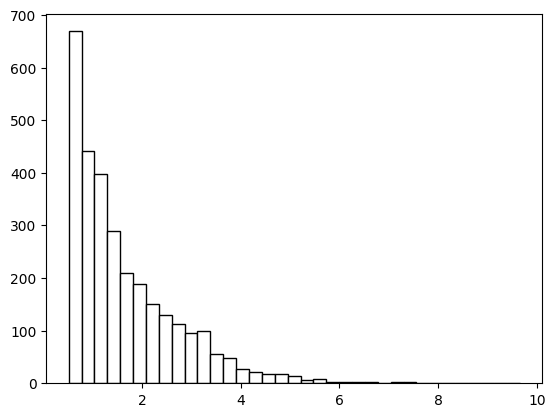

In [66]:
plt.hist(wells["arsenic"], bins = 35, color='white', edgecolor='black')
plt.show()

- For this purpose, we select arsenic levels of 0.5 and 1.0 as reference points because 0.5 represents the lowest unsafe level and 1.0 is twice that, which covers a significant portion of the data range. The computation for this comparison is as follows:

In [67]:
# preparing data
data_as_hi = [1 - np.mean(wells["arsenic"]) for i in range(len(wells))]
data_as_lo = [0.5 - np.mean(wells["arsenic"]) for i in range(len(wells))]
data_hi = np.column_stack([data_intercept, wells["c_dist100"].values, data_as_hi, wells["c_educ4"].values]).T
data_lo = np.column_stack([data_intercept, wells["c_dist100"].values, data_as_lo, wells["c_educ4"].values]).T

# probability of switching a household that its well has arsenic level = 1
expected_p_hi = expit(np.dot(model_switch_edu.params, data_hi))

# probability of switching a household that its well has arsenic level = 0
expected_p_lo = expit(np.dot(model_switch_edu.params, data_lo))

# predictive difference in probability of switching between these two households
pred_dif = expected_p_hi - expected_p_lo

# average predictive difference
np.round(np.mean(pred_dif),3)

0.056

- The result is 0.06—so this comparison corresponds to a 6% difference in probability of switching.
- At the same levels of distance and education, households that wells contain 1 arsenic level, on average, 6% more likely to switch compared to households that wells contain 0.5 arsenic level

#### Average predictive difference in probability of switching, comparing householders with 0 and 12 years of education.

Similarly, we can compute an average predictive difference of the probability of switching for householders with 0 compared to 12 years of education (that is, comparing educ4 = 0 to educ4 = 3):


In [68]:
# preparing data
data_educ4_hi = [3 - np.mean(wells["educ4"]) for i in range(len(wells))]
data_educ4_lo = [0 - np.mean(wells["educ4"]) for i in range(len(wells))]
data_hi = np.column_stack([data_intercept, wells["c_dist100"].values, wells["c_arsenic"].values, data_educ4_hi]).T
data_lo = np.column_stack([data_intercept, wells["c_dist100"].values, wells["c_arsenic"].values, data_educ4_lo]).T

# probability of switching a household that has educ4 = 3
expected_p_hi = expit(np.dot(model_switch_edu.params, data_hi))

# probability of switching a household that has educ4 = 0
expected_p_lo = expit(np.dot(model_switch_edu.params, data_lo))

# predictive difference in probability of switching between these two households
pred_dif = expected_p_hi - expected_p_lo

# average predictive difference
np.round(np.mean(pred_dif),3)

0.117

- The result show 0.12, a difference of 12 percentage points.
- At the same levels of distance and arsenic level, households that householders with 12 years of education, on average, 12% more likely to switch compared to households that householders with 0 years of education

# **Case 3 - National Election Study**
---

- Political scientists interested in presidential vote and its changes over time.
- We want to utilize logistic regression to study the trends of republican vote using the National Election Study

### Load Data

In [71]:
nes = pd.read_csv("nes_vote.csv")
nes

,age_discrete,race_adj,educ1,female,income,rvote,year
0,1,1.0,2,1,4,1.0,1952
1,2,1.0,1,1,4,0.0,1952
2,1,1.0,2,1,3,1.0,1952
3,3,1.0,2,0,3,1.0,1952
4,4,1.0,2,1,1,1.0,1952
...,...,...,...,...,...,...,...
14026,3,1.0,3,1,3,1.0,2000
14027,2,1.0,4,1,4,0.0,2000
14028,3,1.5,3,0,3,1.0,2000
14029,3,1.0,2,1,3,1.0,2000


In [72]:
nes["year"].unique()

array([1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000])

The survey conducted for every 4 year (during preselection in year of presidential vote)
### Predictors

1. ethnicity
  - 0 = white,
  - 1 = black,
  - 0.5 = other

In [73]:
nes["race_adj"].value_counts()

,count
race_adj,
1.0,12239
2.0,1190
1.5,602



2. age (as categories)
   - 18–29,
   - 30–44,
   - 45–64, and
   - 65+ years

In [74]:
nes["age_discrete"].value_counts()

,count
age_discrete,
2,4736
3,4712
4,2307
1,2276


3. education
   - 1 = no high school
   - 2 = high school graduate
   - 3 = some college
   - 4 = college graduate

In [75]:
nes["educ1"].value_counts()

,count
educ1,
2,6218
4,2933
3,2895
1,1985


4. sex

    0=male, 1=female

In [76]:
nes["female"].value_counts()

,count
female,
1,7564
0,6467


5. income. Divide to 5 numbers based on the percentile income rank

In [77]:
nes["income"].value_counts()

,count
income,
4,4686
3,4508
2,2199
1,1701
5,937


### Fit Logistic Regression - in each year

- Build the model using logit for each year of election

In [78]:
def regress_year(data, yr):
    # get data in each year of election
    year = data[data['year'] == yr]

    # initiate logit model, the age variable treat as category with the lowest age category as a baseline
    model = smf.logit('rvote ~ C(age_discrete) + race_adj + educ1 + female + income', data = year)

    # fit model
    fit = model.fit(disp=0)

    # extract coefficient and standard error
    coefs = np.column_stack((fit.params, fit.bse))

    # return coefficient and standard error
    return coefs

Store the estimated coefficient and standard error in `summary` to do visualization

In [79]:
# years to be fitted
yrs = np.arange(1952, 2000+4, 4)

# number of estimated coefficient
num_est_coef = 8

# we store 2 results from the model, the coefficient and standard error
num_res = 2

# create empty array where we can store each coef and standard error per year of election
summary = np.empty((num_est_coef, num_res, len(yrs)))

# fill the array with the result of logit regression in each year of election
for i, yr in enumerate(yrs):
    summary[:, :, i] = regress_year(nes, yr)

Here is the estimated coefficients ± 0.67 standard errors (50% intervals) for the regression of party identification on 8 predictors, as fit independently on survey data from each presidential election campaign from 1952 through 2000

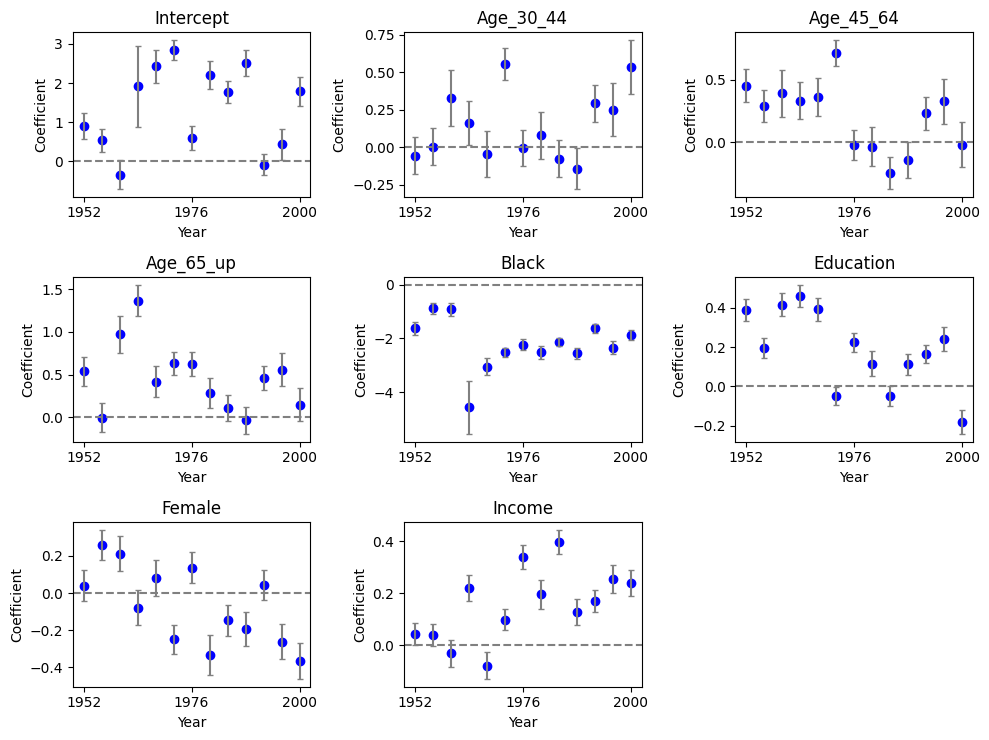

In [80]:
import matplotlib.pyplot as plt

coef_names = ["Intercept",  "Age_30_44", "Age_45_64", "Age_65_up", "Black","Education", "Female", "Income"]

fig, axes = plt.subplots(3, 3, figsize = (10,7.5), sharex=False, sharey=False)
axes = axes.ravel()

for k in range(num_est_coef):
    ax = axes[k]

    # set axis title as the coefficient name
    ax.set_title(coef_names[k])

    # draw line in 0 coefficient
    ax.axhline(0, linestyle='--', color='gray')

    # set xticks
    ax.set_xticks([1952,1976,2000])

    # plot the coefficient value
    ax.scatter(yrs, summary[k,0,], marker='o',color="b")
    ax.set_ylabel("Coefficient")
    ax.set_xlabel("Year")

    # plot the +- 1 standard eror
    ax.errorbar(yrs, summary[k,0,],
                yerr = summary[k,1,]*.67,
                fmt = 'none',
                ecolor = 'gray',
                capsize = 2)

# access each axes object
for ax in axes.flat:

    # check if something was plotted
    if not bool(ax.has_data()):

        # delete if nothing is plotted
        fig.delaxes(ax)

plt.tight_layout()

plt.show()

### Interpretation

- Ethnicity predictors are the most far values from zero compared to other, we can say it's the most important predictor, and their coefficients have been changing over time. Black ethnicity more likely do not support republican
- The predictive differences for age and sex change fairly dramatically during the 40-year period.
- Higher income has consistently been predictive of Republican support except two years in 1960 and 1964, but the connection became stronger toward the end of the century
- Higher education has consistently been predictive of Republican support before 1974, but the connection suddenly drop in 2000